# Code for image benchmark visualization

## 1. Imports

In [1]:
import torch
from matplotlib import pyplot as plt
from eot_benchmark.image_benchmark import ImageBenchmark

## 2. Config

In [2]:
EPS = 0.1
GPU_DEVICE = 0

## 3. Initialize Benchmark

In [3]:
benchmark = ImageBenchmark(batch_size=20, eps=EPS, glow_device=f"cuda:{GPU_DEVICE}",
                           samples_device=f"cuda:{GPU_DEVICE}", download=True)

X_sampler = benchmark.X_sampler
Y_sampler = benchmark.Y_sampler
GT_sampler = benchmark.GT_sampler

Downloading...
From: https://drive.google.com/uc?id=1QDHxJIYjHnpoJMq1IBwap5SlWJtyMjIi
To: /home/pvmokrov/eot_benchmark_data/image_benchmark.zip
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2.55G/2.55G [00:35<00:00, 70.9MB/s]
/usr/local/lib/python3.8/dist-packages/eot_benchmark/glow_model.py:102: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  w_s = torch.from_numpy(w_s)
Downloading...
From: https://drive.google.com/uc?id=1QDHxJIYjHnpoJMq1IBwap5SlWJtyMjIi
To: /home/pvmokrov/eot_benchmark_data/image_benchmark.zip
100%|████████████████

### Ground Truth (X, Y) samples

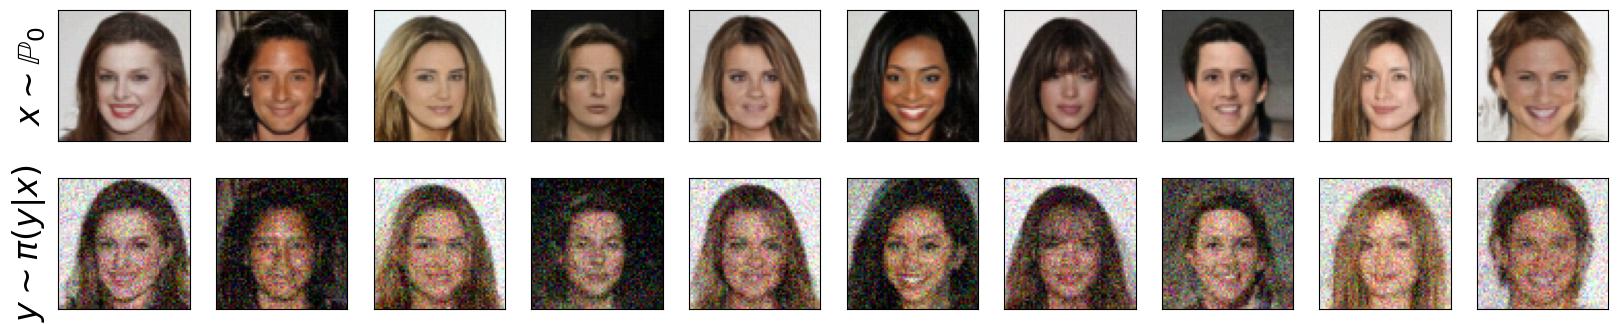

In [4]:
x_samples, y_samples = GT_sampler.sample(10)
fig, axes = plt.subplots(2, 10, figsize=(20, 4))

for i in range(2):
    for j in range(10):
        ax = axes[i,j]
        if i == 0:
            ax.imshow((x_samples[j].cpu().permute(1, 2, 0)*0.5 + 0.5).clip(0, 1))
        elif i== 1:
            ax.imshow((y_samples[j].cpu().permute(1, 2, 0)*0.5 + 0.5).clip(0, 1))
            
        if j == 0:
            if i == 0:
                ax.set_ylabel(r"$x \sim \mathbb{P}_0$", fontsize=24)
            if i == 1:
                ax.set_ylabel(r"$y \sim \pi(y|x)$", fontsize=24)
            
        ax.get_xaxis().set_visible(False)
        ax.set_yticks([])

### Independent X and Y samples

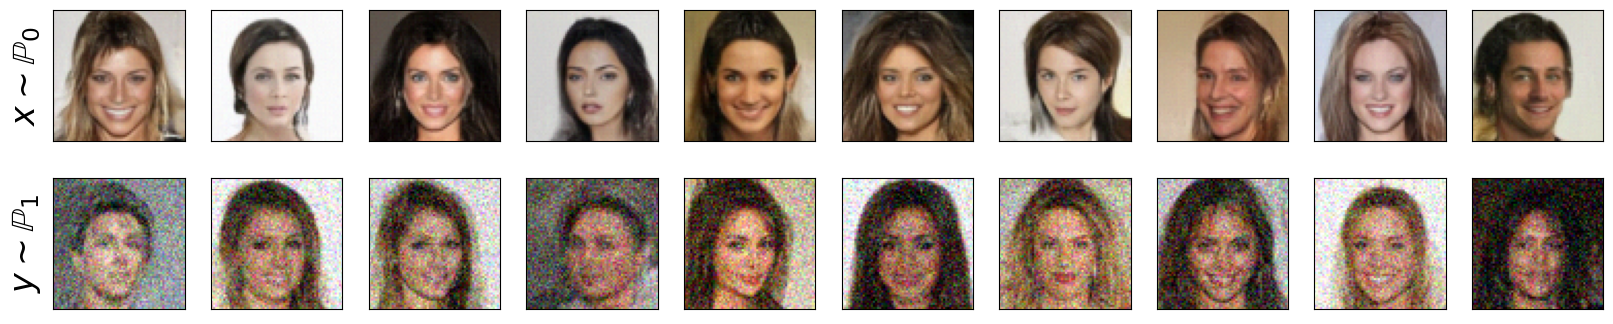

In [5]:
x_samples = X_sampler.sample(10)
y_samples = Y_sampler.sample(10)

fig, axes = plt.subplots(2, 10, figsize=(20, 4))

for i in range(2):
    for j in range(10):
        ax = axes[i,j]
        if i == 0:
            ax.imshow((x_samples[j].cpu().permute(1, 2, 0)*0.5 + 0.5).clip(0, 1))
        elif i== 1:
            ax.imshow((y_samples[j].cpu().permute(1, 2, 0)*0.5 + 0.5).clip(0, 1))
            
        if j == 0:
            if i == 0:
                ax.set_ylabel(r"$x \sim \mathbb{P}_0$", fontsize=24)
            if i == 1:
                ax.set_ylabel(r"$y \sim \mathbb{P}_1$", fontsize=24)
            
        ax.get_xaxis().set_visible(False)
        ax.set_yticks([])